# IMPORTAR LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# CARGAR DATOS

In [19]:
preprocessed_titanic_df = sns.load_dataset('titanic')
preprocessed_titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# VALIDACIÓN DE DATOS

## ¿Qué tipo de dato tienen las variables del dataset?

In [3]:
preprocessed_titanic_df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


## ¿Cuántas variables de cada tipo de datos tenemos en el dataset?

In [4]:
preprocessed_titanic_df.dtypes.value_counts()

,count
object,5
int64,4
float64,2
bool,2
category,1
category,1


## ¿Cuantas variables y registros tenemos en el dataset?(filas y columnas)

In [5]:
preprocessed_titanic_df.shape

(891, 15)

# VALIDACIÓN DE DATOS NULOS

## ¿Existen valores nulos en el dataset?

In [6]:
preprocessed_titanic_df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## ¿Que variables tienen datos nulos?

In [7]:
preprocessed_titanic_df.isnull().any()

,0
survived,False
pclass,False
sex,False
age,True
sibsp,False
parch,False
fare,False
embarked,True
class,False
who,False


## ¿Cuantos valores nulos se tienen por variable?

In [8]:
preprocessed_titanic_df.isnull().sum().sort_values(ascending=False)

,0
deck,688
age,177
embarked,2
embark_town,2
survived,0
pclass,0
sex,0
sibsp,0
parch,0
fare,0


## ¿Cuántos valores nulos tenemos en total en el dataset?

In [9]:
preprocessed_titanic_df.isnull().sum().sum()

869

## ¿Cual es la proporción de valores nulos por cada variable?

In [10]:
preprocessed_titanic_df.isnull().melt(value_name='missing')

,variable,missing
0,survived,False
1,survived,False
2,survived,False
3,survived,False
4,survived,False
...,...,...
13360,alone,False
13361,alone,False
13362,alone,False
13363,alone,False


# GRAFIMOS LOS VALORES NULOS

In [11]:
titanic_null_df = preprocessed_titanic_df.isnull().melt(value_name='missing')
titanic_null_df

,variable,missing
0,survived,False
1,survived,False
2,survived,False
3,survived,False
4,survived,False
...,...,...
13360,alone,False
13361,alone,False
13362,alone,False
13363,alone,False


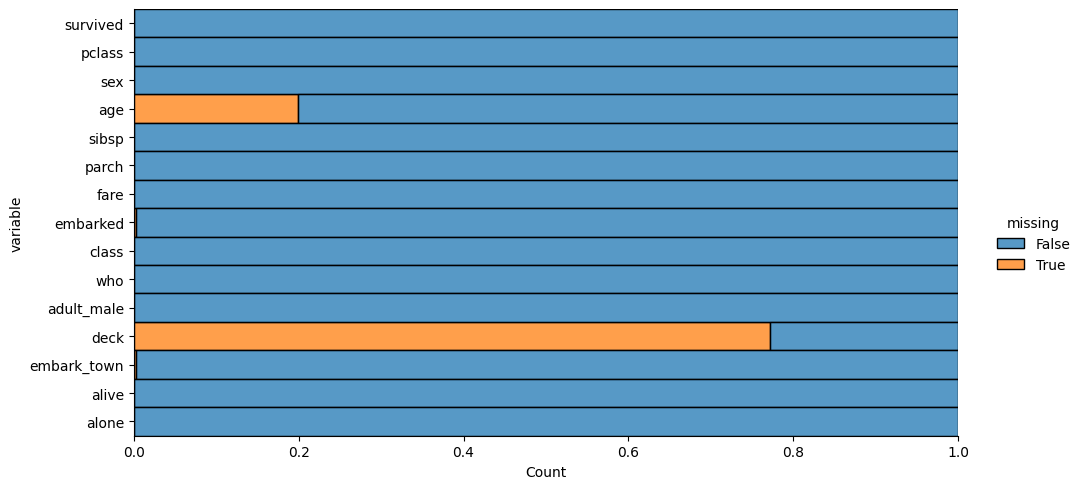

In [12]:
sns.displot(data=titanic_null_df,y='variable',hue='missing',aspect=2,multiple='fill')
plt.show()

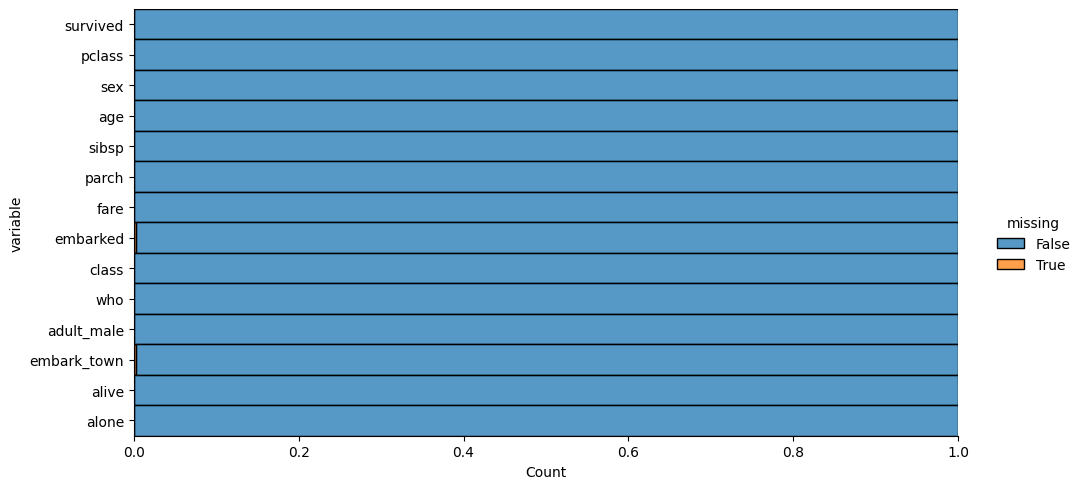

In [24]:
(
    preprocessed_titanic_df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df :(
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

## ¿Como ver los valoresnulos en todo el dataset?

In [14]:
(
    preprocessed_titanic_df
    .isnull()
    .transpose()
)

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
survived,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
pclass,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sex,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
age,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
sibsp,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
parch,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
fare,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
embarked,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
class,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
who,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

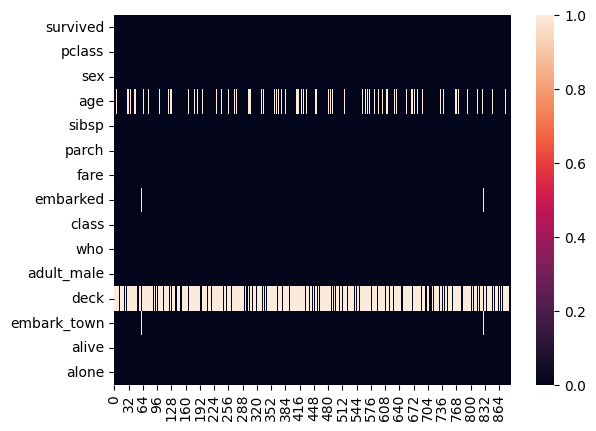

In [15]:
(
    preprocessed_titanic_df
    .isnull()
    .transpose()
    .pipe(
        lambda df : sns.heatmap(data=df)
    )
)

## ¿Cuantos registros me quedarian si elimino los nulos?

In [25]:
preprocessed_titanic_df.shape

(891, 14)

In [26]:
titanic_df_without_nulls = preprocessed_titanic_df.dropna()
titanic_df_without_nulls.shape

(889, 14)

IMPUTACIÓN DE DATOS

In [20]:
preprocessed_titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


LLENAMOS LAS EDADES CON VALOR NULO CON LA EDAD PROMEDIO

In [21]:
preprocessed_titanic_df['age'].fillna(preprocessed_titanic_df['age'].mean(),inplace=True)

ELIMINAMOS LA COLUMNA DECK

In [23]:
preprocessed_titanic_df.drop(columns=['deck'],inplace=True)